<a href="https://colab.research.google.com/github/SamaSamrin/2024/blob/main/kNN_Imputation_for_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datasets may have missing values, and this can cause problems for many machine learning algorithms.

As such, it is good practice to identify and replace missing values for each column in your input data prior to modeling your prediction task. This is called ***missing data imputation***, or imputing for short.

A popular approach to missing data imputation is to **use a model to predict the missing values.** This requires a **model to be created for each input variable that has missing values**. Although any one among a range of different models can be used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as “nearest neighbor imputation.”

We usually use Euclidean distance to calculate the nearest neighbor. If we have two points (x, y) and (a, b). The formula for Euclidean distance (d) will be

d = sqrt((x-a)²+(y-b)²)

k-NN links:
* https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
filepath = "/content/drive/MyDrive/2024/my coding/my datasets/diabetes.csv"

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(filepath)
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

The last 3 lines(**confusion_matrix**, **accuracy_score**, and **f1_score**) are for checking the accuracy of the model. **train_test_split** is to split and train the data. **KNeighborsClassifier** is for K nearest neighbor.

Standardization of datasets is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 There are some factors where the values cannot be zero. Glucose values, for example, cannot be 0 for a human. Similarly, BloodPressure, SkinThickness, Insulin, and BMI cannot be zero for a human.

We create a list called non_zero which has all the columns needed for predicting the outcome value. We need to make sure these columns do not have zero or NaN value. If we have 0 then we will replace it with NaN. And then replace NaN with the mean value of the column.

In [8]:
non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for column in non_zero:
    df[column] = df[column].replace(0,np.NaN)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)
    print(df[column])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


Checking the dataset after changing the zero values to mean values

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Plotting the details

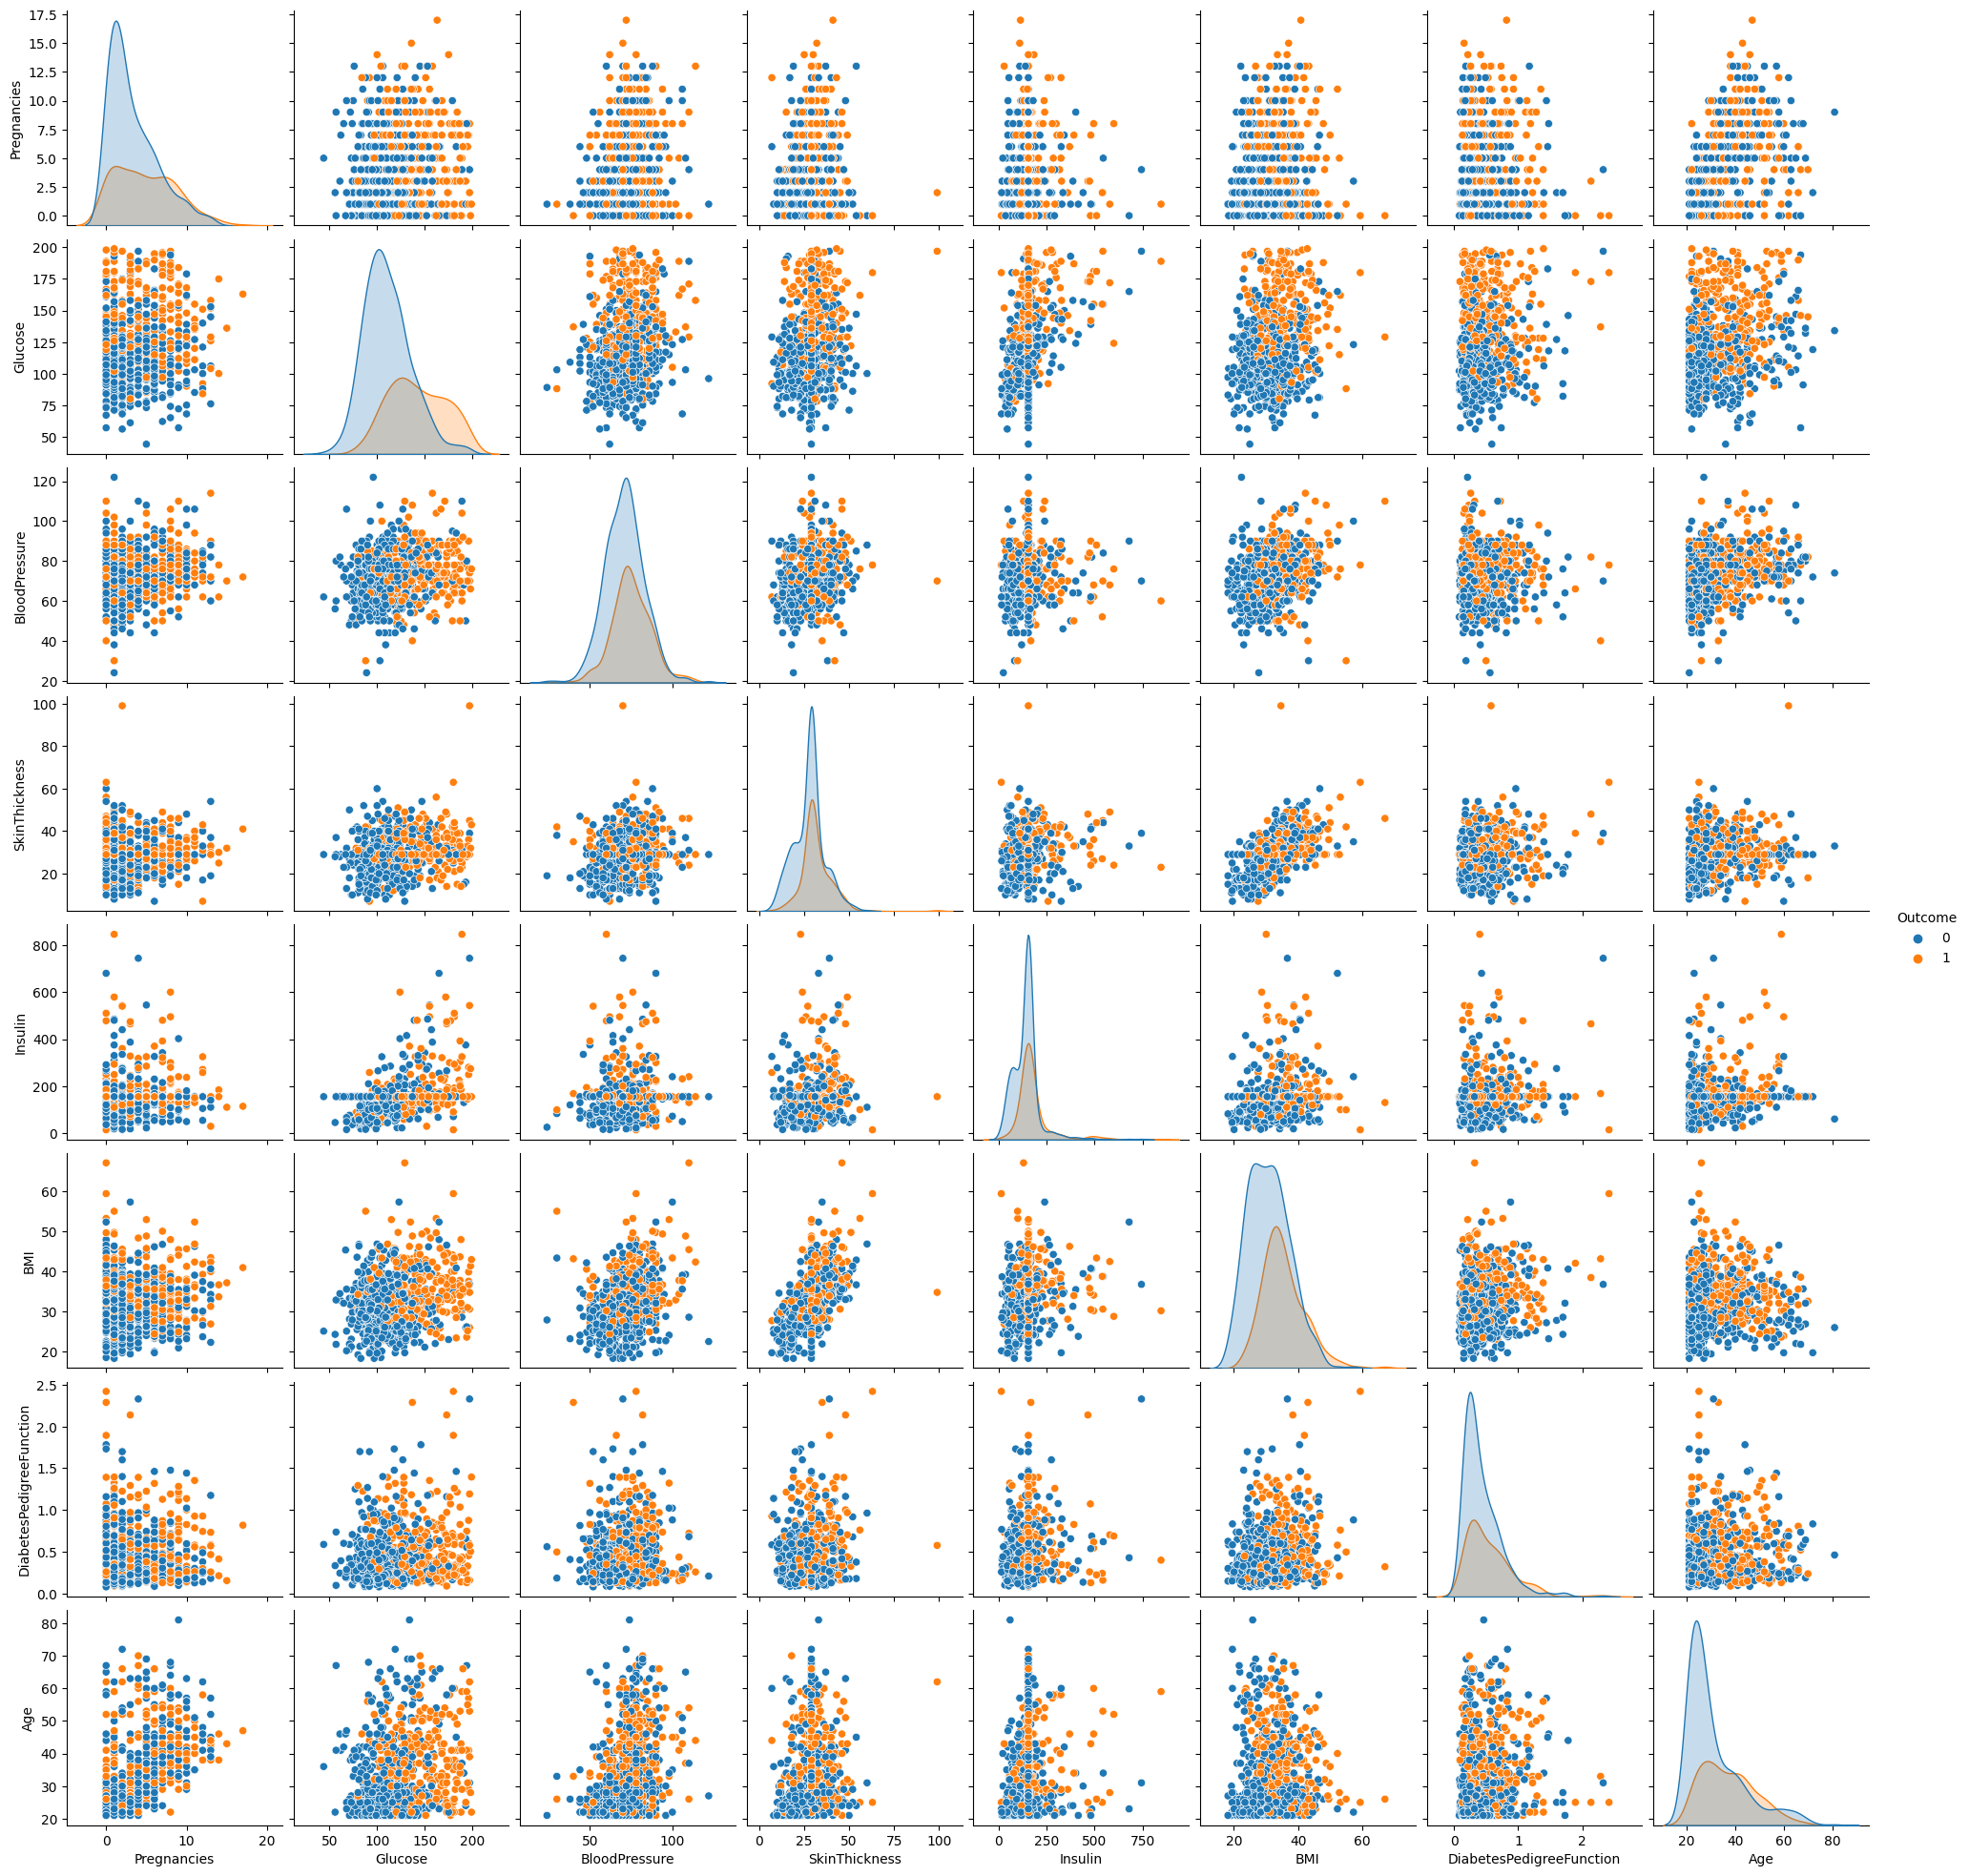

In [10]:
import seaborn as sns
p=sns.pairplot(df, hue = 'Outcome')